# Linear and Logistic Regression
- **100 points**

### Instructions
- you cannot use any other library.Write the code from scratch.
- You're free to add any number of methods within each class.
- You may also add any number of additional code blocks that you deem necessary.
- link for the datasets - https://drive.google.com/drive/folders/1MXmIChMxodGbEpowyVJBFLdvaDpj23gd?usp=sharing


## Question 1 (50 points)

## Linear Regression

In this section, we'll implement a linear regression model that can learn to predict a target/dependent variable based on multiple independent variables. We'll be using gradient descent to train the model.

In [109]:
# Importing Libraries
import time
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Data Preparation.
To keep things simple, first we'll use a toy dataset to test our implementation. This dataset contains the heights and weights of a few individuals. Our goal is to predict the weight of an individual given their height using a linear regression model.

In [110]:
df = pd.read_csv('./heights.csv')

In [111]:
df.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


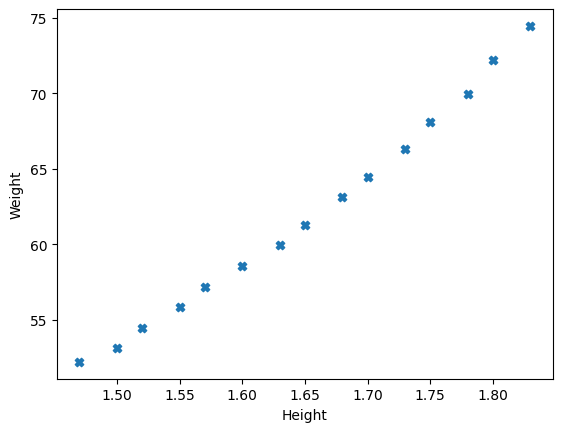

In [112]:
import matplotlib.pyplot as plt

plt.scatter(df['Height'], df['Weight'], marker='X')
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

Looking at the distribution of the data, it seems like `Weight` and `Height` have a linear relationship. Hence, a linear regression model should be able to capture this relationship.  

Let's us convert the dataframe `df` to a Numpy array so that it is easier to perform operations on it.

In [113]:
X_train = np.array(df['Height'])
y_train = np.array(df['Weight'])
X_train = np.expand_dims(X_train, -1)

### (30 points) Implement the ` LinearRegression` class
Make sure it works with more than 1 feature.  
**NOTE:** Do **NOT** forget to include a bias term in the weights.

In [114]:
from sklearn.linear_model import LinearRegression

### Build the model and train on the dataset.

In [115]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### (5 points) Implement the evaluation metric `mean squared error`.
We use the [mean squared error (MSE)](https://en.wikipedia.org/wiki/Mean_squared_error) as the metric to evaluate our model.

In [116]:
from sklearn.metrics import mean_squared_error

### Make predictions using the model and evaluate it.

In [117]:
y_pred = model.predict(X_train)
print("Train MSE: {:.4f}".format(mean_squared_error(y_pred, y_train)))

Train MSE: 0.4994


### Plot the predicted and the actual values.

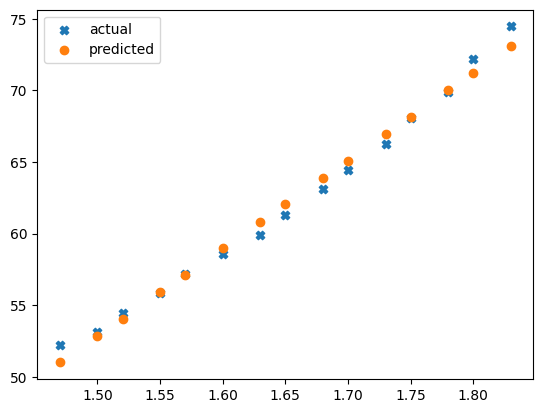

In [118]:
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, marker='X', label='actual')
plt.scatter(X_train, y_pred, marker='o', label='predicted')
plt.legend()
plt.show()

### Multiple linear regression for sales prediction

Next we use our linear regression model to learn the relationship between sales and advertising budget for a product. The `advertise.csv` dataset contains statistics about the sales of a product in 200 different markets, together with advertising budgets in each of these markets for different media channels: TV, radio, and newspaper. The sales are in thousands of units and the budget is in thousands of dollars.  

We will train a linear regression model to predict the sales of the product given the TV, radio, and newspaper ad budgets.

In [119]:
df = pd.read_csv('./advertise.csv')

In [120]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [121]:
X = np.array(df[['TV', 'Radio', 'Newspaper']])
y = np.array(df['Sales'])

### (5 points) Normalize the features in your dataset.

Gradient descent-based models can be sensitive to different scales of the features/independent variables. Hence, it is important to normalize them. You may use the functions, `dataset_minmax`, `normalize_dataset`, and `unnormalize_dataset`, provided in the code block below to perform [min-max normalization](https://en.wikipedia.org/wiki/Feature_scaling) on the features.

In [122]:
from sklearn import preprocessing

In [123]:
scaler=preprocessing.MinMaxScaler(feature_range=(0, 1))
X=scaler.fit_transform(X)

In [124]:
from sklearn.model_selection import train_test_split

### Split the data into train and test set.

In [125]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

### Build the model and train on the dataset.

In [126]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### (10 points) Evaluation on training and test set.
If you have implemented `LinearRegression` correctly, the **test MSE** should be < 3.

In [127]:
print("Training MSE: {:.4f}".format(mean_squared_error(model.predict(X_train), y_train)))
print("Test MSE: {:.4f}".format(mean_squared_error(model.predict(X_test), y_test)))

Training MSE: 2.6761
Test MSE: 2.9078


# Using Closed Form Solution(75)


* For both the above 2 models you need to try out the closed form solutions
* The more efforts you put in, the more marks you get.
* It is open ended

In [128]:
#no library found but thought of simpler code than part (A)
def closedform(X,y):
  X=np.concatenate([np.ones((X.shape[0],1)),X],axis=1) #bias column is the first column
  w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
  return w

In [129]:
height_df=pd.read_csv('/content/heights.csv')
X_train = np.array(height_df['Height'])
y_train = np.array(height_df['Weight'])
X_train = np.expand_dims(X_train, -1)

In [130]:
w=closedform(X_train,y_train)
b=w[:1]
W=w[1:]

y_pred=np.dot(X_train,W)+b
print(f'MSE of closed form (heights data):{mean_squared_error(y_pred,y_train)}')

MSE of closed form (heights data):0.4993705602588393


In [131]:
advertise_df=pd.read_csv('/content/advertise.csv')
X = np.array(df[['TV', 'Radio', 'Newspaper']])
y = np.array(df['Sales'])
scaler=preprocessing.MinMaxScaler(feature_range=(0, 1))
X=scaler.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [132]:
w=closedform(X_train,y_train)
b=w[:1]
W=w[1:]

print(f'MSE of train data(advertise):{mean_squared_error(np.dot(X_train,W)+b,y_train)}')
print(f'MSE of test data(advertise):{mean_squared_error(np.dot(X_test,W)+b,y_test)}')

MSE of train data(advertise):2.6761426537826694
MSE of test data(advertise):2.907756910271099


## Question 2 (50 points)

## Logistic Regression

In this section, we'll implement a logistic regression model that can learn to predict the class/label of a target/dependent variable based on multiple independent variables. We'll be using gradient descent to train the model.

### Data Preparation
Once again, to keep things simple, first we'll use the heights and weights dataset to test our implementation. Let's divide the weights into 2 categories: 0 if the weight is < 60 and 1 otherwise. Our goal is to predict the weight category of an individual given their height using a logistic regression model.

In [133]:
df = pd.read_csv('./heights.csv')
df.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


In [134]:
X_train = np.array(df['Height'])
y_train = np.array((df['Weight'] >= 60).astype('float'))
X_train = np.expand_dims(X_train, -1)

In [135]:
scaler=preprocessing.StandardScaler()
X_train=scaler.fit_transform(X_train)

### (30 points) Implement the ` LogisticRegression` class
Make sure it works with more than 1 feature.  
**NOTE:** Do **NOT** forget to include a bias term in the weights.

In [136]:
from sklearn.linear_model import LogisticRegression

### Build the model and train on the dataset.

In [137]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### (5 points) Implement the evaluation metric `accuracy`.
We use the [accuracy](https://developers.google.com/machine-learning/crash-course/classification/accuracy) as the metric to evaluate our model.

### Make predictions using the model and evaluate it.

In [138]:
from sklearn.metrics import accuracy_score

In [139]:
y_pred = model.predict(X_train)

print(f'Train Accuracy: {accuracy_score(y_pred, y_train)}')

Train Accuracy: 1.0


### Plot the predicted and the actual values.

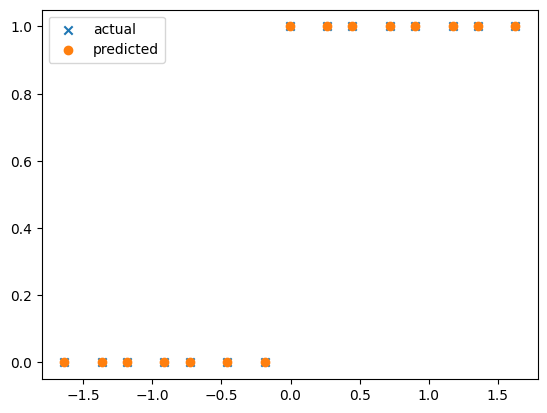

In [140]:
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, marker='x', label='actual')
plt.scatter(X_train, y_pred, marker='o', label='predicted')

plt.legend()
plt.show()

# ** Use the Newton Raphson Method for the same** (75 marks)


In [141]:
#no library found

# K Means Clustering(100 marks)



In [142]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters of the two Gaussians
mu1 = np.array([3, 3])
Sigma1 = np.array([[1, 0], [0, 2]])

mu2 = np.array([1, -3])
Sigma2 = np.array([[2, 0], [0, 1]])

mu3 = np.array([-10, 8])
Sigma3 = np.array([[2, 0], [0, 2]])



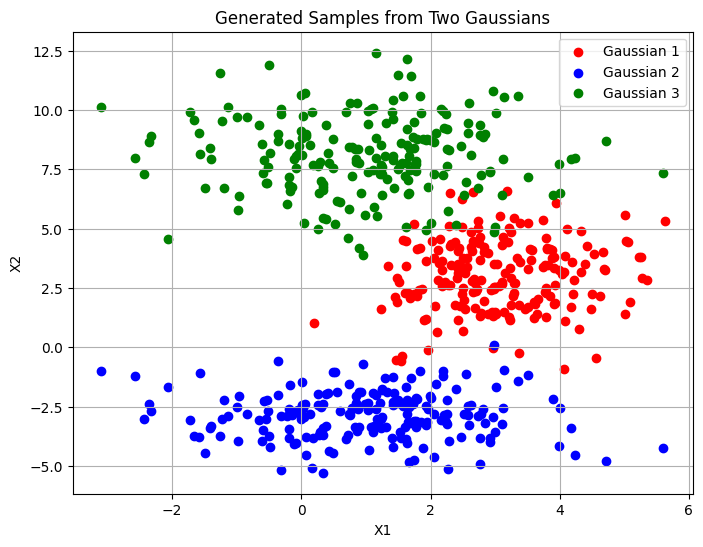

In [143]:
n_samples = 200
samples1 = np.random.multivariate_normal(mu1, Sigma1, n_samples)
samples2 = np.random.multivariate_normal(mu2, Sigma2, n_samples)
samples3 = np.random.multivariate_normal(mu3, Sigma3, n_samples)

# Plot the generated samples
plt.figure(figsize=(8, 6))
plt.scatter(samples1[:, 0], samples1[:, 1], c='red', label='Gaussian 1')
plt.scatter(samples2[:, 0], samples2[:, 1], c='blue', label='Gaussian 2')
plt.scatter(samples2[:, 0], samples3[:, 1], c='green', label='Gaussian 3')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Generated Samples from Two Gaussians')
plt.legend()
plt.grid(True)
plt.show()

The above is the dataset generated from 3 gaussians, and a visualizations for the same, You need to assume that you have the data and then you use k means for the same your output should be similar to what is shown above

In [144]:
from sklearn.cluster import KMeans


In [145]:

X=np.vstack((samples1,samples2,samples3))
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [146]:
import matplotlib.pyplot as plt

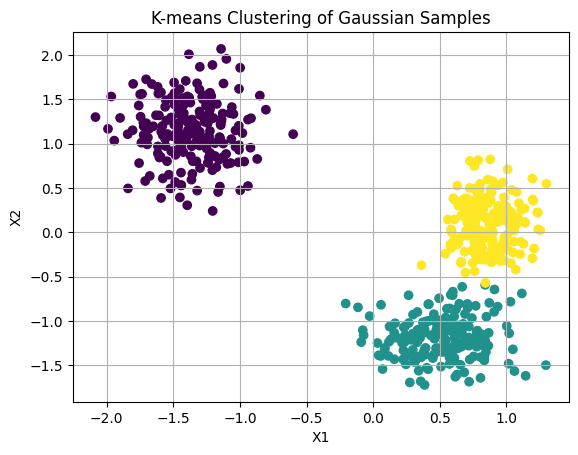

In [147]:
plt.scatter(X_scaled[:,0],X_scaled[:,1],c=kmeans.labels_)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('K-means Clustering of Gaussian Samples')
plt.grid(True)

plt.show()